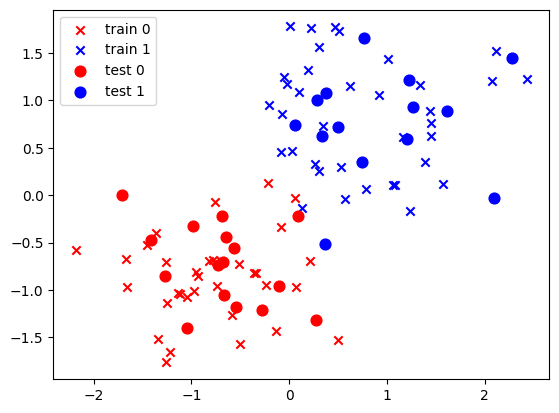

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(seed=0)
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 ) # [2,2]:平均、[[2,0],[0,2]]：共分散、50：生成する個数
y_0 = np.zeros(len(X_0)) # 0のリストを生成(X_0の正解ラベル)

X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 ) # [6,7]:平均、[[3,0],[0,3]]：共分散、50：生成する個数
y_1 = np.ones(len(X_1)) # 1のリストを生成(X_1の正解ラベル)

X = np.vstack((X_0, X_1)) # vstack:縦方向に配列を結合
y = np.append(y_0, y_1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 学習用70%、テスト用30%に分割

# 特徴データを標準化(平均 0、標準偏差 1)
# fit_transform: 訓練データの平均と標準偏差を計算し、それを使用してデータを標準化
# transform: 訓練データの平均と標準偏差を使用してテストデータを標準化(データリーク防止のためテストデータの統計量を使ってはいけない)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # fit と transform をまとめて行う
X_test_std = sc.transform(X_test) # fitの結果を使ってデータ変換

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.legend(loc='upper left')

In [4]:
from sklearn.linear_model import LogisticRegression

# 訓練
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# テストデータ 30個を分類
print (lr.predict(X_test_std))

# 精度を確認
print (lr.score(X_test_std, y_test))

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]
0.9666666666666667


[0.16389062]
[[1.81538085 2.27194045]]
[1.5259515603560918, -1.6702252527851853]


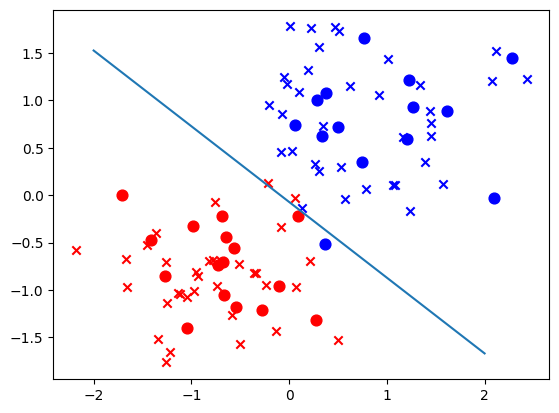

In [ ]:
print (lr.intercept_) # 切片を出力 [ w_0 ]
print (lr.coef_)  # 重みを出力 [ [w_1, w_2 ] ]

w_0 = lr.intercept_[0] # 切片
w_1 = lr.coef_[0,0] # 1つ目の特徴量(x軸)の重み
w_2 = lr.coef_[0,1] # 2つ目の特徴量(y軸)の重み

# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2

# 上記の式を使って、x座標が -2 と 2 のときの y座標を計算
# map と lambda を使い、リスト [-2, 2] の各要素に対して計算を適用
print(list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

# 境界線 プロット
plt.plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

# --- 以下は前回同様、データの散布図を描画 ---
# 学習データのプロット（クラス0:赤x、クラス1:青x）
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
# テストデータのプロット（クラス0:赤丸、クラス1:青丸）
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.show()

c=1.0
w_0=0.0 w_1=2.3773598695366567 w_2=3.1465087753914402
c=10.0
w_0=-0.20524736798010712 w_1=7.474214760937196 w_2=6.108618998013806
c=100.0
w_0=-1.3798014220632837 w_1=27.552533713030662 w_2=13.231874580271594
c=1000.0
w_0=-12.249364807129894 w_1=187.63220343953296 w_2=70.12578476934449


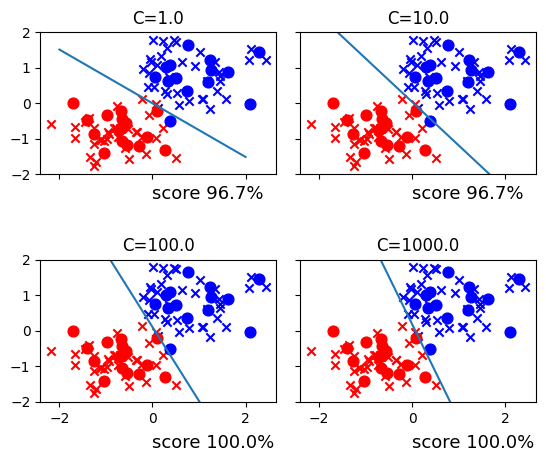

In [ ]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True) # 2行2列のグラフ領域を作成。軸の範囲を共有する。
plt.ylim([-2, 2]) # y軸の表示範囲を [-2, 2] に設定
plt.subplots_adjust(wspace=0.1, hspace=0.6) # グラフ間の水平方向の間隔と垂直方向の間隔を設定
c_params = [1.0, 10.0, 100.0, 1000.0] # 試したい正則化パラメータの値のリスト
for i, c in enumerate(c_params): # enumerate:リストを順番に処理
    # L1正則化、C=c、ソルバーはliblinear（L1に適したもの）を指定してモデルを作成
    # L1正則化: C = Loss + λ * Σ|w|
    # L2正則化: C = Loss + λ * Σ(w^2)
    # ElasticNet正則化: C = Loss + λ * (α * Σ|w| + (1-α) * Σ(w^2))
    lr = LogisticRegression(penalty="l1", C=c, solver='liblinear')
    lr.fit(X_train_std, y_train) # モデルを学習

    w_0 = lr.intercept_[0] # 切片
    w_1 = lr.coef_[0,0] # 1つ目の特徴量(x軸)の重み
    w_2 = lr.coef_[0,1] # 2つ目の特徴量(y軸)の重み
    score = lr.score(X_test_std, y_test) # テストデータの精度を計算

    # i を使って描画先のパネルを指定 (0,0), (0,1), (1,0), (1,1) になる
    axs[int(i/2), i%2].set_title('C=' + str(c)) # タイトルを設定
    # 境界線の描画（前回解説した直線の方程式）
    axs[int(i/2), i%2].plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

    # 各データをプロット（学習・テスト、クラス0・1の4パターン）
    axs[int(i/2), i%2].scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
    axs[int(i/2), i%2].scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
    axs[int(i/2), i%2].scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
    axs[int(i/2), i%2].scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

    if (i < 2):
        axs[int(i/2), i%2].text(0,-2.7, 'score ' + str(round(score,3)*100) + '%', size=13)
    else:
        axs[int(i/2), i%2].text(0,-3.3, 'score ' + str(round(score,3)*100) + '%', size=13)

    print("c={}".format(c))
    print("w_0={} w_1={} w_2={}".format(w_0, w_1, w_2))
